# Example 8.1: Piston Exergy Analysis

*John F. Maddox, Ph.D., P.E.<br>
University of Kentucky - Paducah Campus<br>
ME 321: Engineering Thermodynamics II<br>*

## Problem Statement
The piston cylinder shown below is initially at a state of $T_1=60^\circ\text{C}$, $P_1=200\,\text{kPa}$.  Heat is added to the system from a $500^\circ\text{C}$ reservoir until the final pressure is $400\,\text{kPa}$. The mass of the air is $2\,\text{kg}$, the spring constant is $1000\,\text{kN/m}$, and the cross sectional area of the piston is $A_p=0.1\,\mathrm{m^2}$. The piston moves $0.1\,\text{m}$ before contacting the linear spring.
* (a) How much work is done by the air in the cylinder?
* (b) How much heat transfer took place?
* (c) What is the entropy generation, $S_{gen}$?
* (d) Sketch and label a $T$-$s$ diagram of the air.
* (e) How much exergy is stored in the system at the and at the end of the process
* (f) What is the change in exergy for the process?
* (g) How much exergy was destroyed during the process?
* (f) What is the second law efficiency of the process, $\eta_{II}$?

## Solution

__[Video Explanation](https://uky.yuja.com/V/Video?v=3071305&node=10458695&a=1201605425&autoplay=1)__

### Python Initialization
We'll start by importing the libraries we will use for our analysis and initializing dictionaries to hold the properties we will be usings.

In [1]:
from kilojoule.templates.kSI_C import *
air = idealgas.Properties('Air')

### Given Parameters
We now define variables to hold our known values.

In [2]:
T[0] = Quantity(20,'degC')    # dead state temperature
p[0] = Quantity(1,'bar')      # dead state pressure
T[1] = Quantity(60,'degC')    # initial temperature
p[1] = Quantity(200,'kPa')    # initial pressure
p_final = Quantity(400,'kPa') # final pressure
A_p = Quantity(0.1,'m^2')     # piston area
Delta_x = Quantity(0.1,'m')   # distance between initial state and spring
m = Quantity(2,'kg')          # mass
T_R = Quantity(500,'degC')    # temperature of heat reservoir
k = Quantity(1000,'kN/m')     # spring constant

Summary();

<IPython.core.display.Latex object>

,T,p
unit,°C,kPa
0,20,100.0
1,60,200.0


### Assumptions
  - Negligible changes in kinetic energy
  - Negligible changes in potential energy
  - Isobaric from 1-2
  - Spring restrained from 2-3
  - Treat air as ideal gas

In [3]:
p[2] = p[1]
p[3] = p_final
R = air.R

Calculations();

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### (a) How much work is done by the air in the cylinder?
Since we are treating air as in ideal gas and we know both the temperature and the pressure at state 1, we can determine the specific volume at state 1.  To do this we can either solve the ideal gas law for $v$ or we can use the `air` property tables we imported above.

In [4]:
v_tables = air.v(T[1], p[1])
v_ig = R*T[1].to('K')/p[1]
v[1] = v_ig

Calculations();

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

The initial volume can then be found with the mass and the specific volume

In [5]:
Vol[1] = m*v[1]

Calculations();

<IPython.core.display.Latex object>

The change in volume for 1 to 2 due to the expansion of the fluid can be calculated with the cross-sectional area of the piston and the space between the piston and the spring

In [6]:
Vol[2] = Vol[1] + Delta_x*A_p

Calculations();

<IPython.core.display.Latex object>

The process from 1 to 2 is isobaric so the boundary work, $W_{1\to2}=\int_1^2p\ dv$, can be evaluated by pulling the pressure (constant) out of the integral

In [7]:
W_1_to_2 = p[1]*(Vol[2]-Vol[1])
W_1_to_2.ito('kJ') # hide

Calculations();

<IPython.core.display.Latex object>

The spring must provide enough force to support the change in pressure.  So the spring relations can be used to determine the necessary change in volume by solving the following equation for $\Delta V$
$$\Delta p=\frac{k}{A^2}\Delta V$$

In [8]:
Vol[3] = Vol[2] + (p[3]-p[2])*A_p**2/k

Calculations();

<IPython.core.display.Latex object>

The work from 2 to 3 is most easily calculated by looking at the area under the curve on the $p$-$V$ diagram.  Recall that the pressure varies linearly with the change in volume for a piston in contact with an ideal spring

In [9]:
W_2_to_3 = (p[3]+p[2])/2*(Vol[3]-Vol[2])
W_2_to_3.ito('kJ')

Calculations();

<IPython.core.display.Latex object>

The total work is then the summation the two processes

In [10]:
# Work from 1 to 3
W_1_to_3 = W_1_to_2 + W_2_to_3
W_tot = W_1_to_3

Calculations();

 Work from 1 to 3

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### (b) How much heat transfer took place?
We need two independent properties at state 3.  We know the pressure and we can find the specific volume from the mass and total volume

In [11]:
v[3] = Vol[3]/m

Calculations();

<IPython.core.display.Latex object>

We now have enough information to look up the final temperature and the internal energy at the beginning and the end

In [12]:
T[3] = air.T(p[3],v[3])
u[1] = air.u(T[1],p[1])
u[3] = air.u(T[3],p[3])

Calculations();

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

The first law can be applied from state 1 to state 3 to determine the total heat transfer for the process

In [13]:
# 1st Law
Q_1_to_3 = m*(u[3]-u[1]) + W_1_to_3

Calculations();

 1st Law

<IPython.core.display.Latex object>

#### (c) What is the entropy generation, $S_{gen}$?
To apply the 2nd law from 1 to 3, we will need the specific entropies, which we can look up with the same two independent intensive properties as the other properties

In [14]:
# Entropies from property tables
s[1] = air.s(T[1],p[1])
s[3] = air.s(T[3],p[3])

Calculations();

 Entropies from property tables

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

The 2nd law can then be solved for the entropy generation.

In [15]:
# 2nd Law
S_gen = m*(s[3]-s[1]) - Q_1_to_3/T_R.to('K')

Calculations();

 2nd Law

<IPython.core.display.Latex object>

#### (d) Sketch a $T$-$s$ diagram of the air

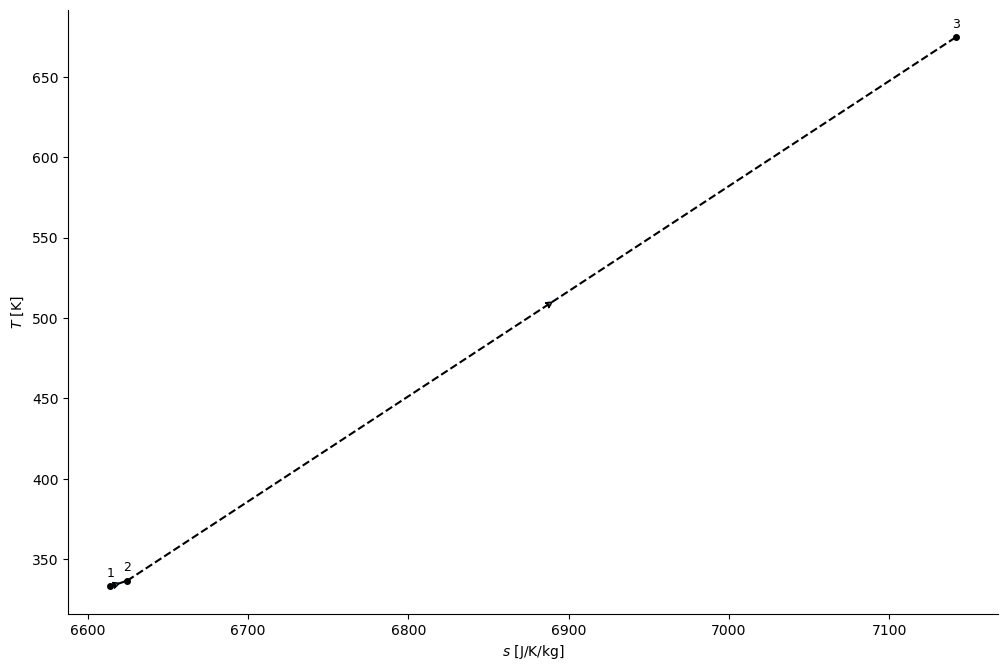

In [16]:
# Still need to find T[2] and s[2]
v[2] = Vol[2]/m
T[2] = air.T(p[2], v[2])
s[2] = air.s(p[2], v[2])

# Plot T-s diagram
Ts = air.Ts_diagram(unit_system='SI_K')
Ts.plot_state(states[1])
Ts.plot_state(states[2])
Ts.plot_state(states[3])
Ts.plot_process(states[1],states[2],path='isobaric')
Ts.plot_process(states[2],states[3],path='unknown');

We can also visualize the process on a $p$-$v$ diagram

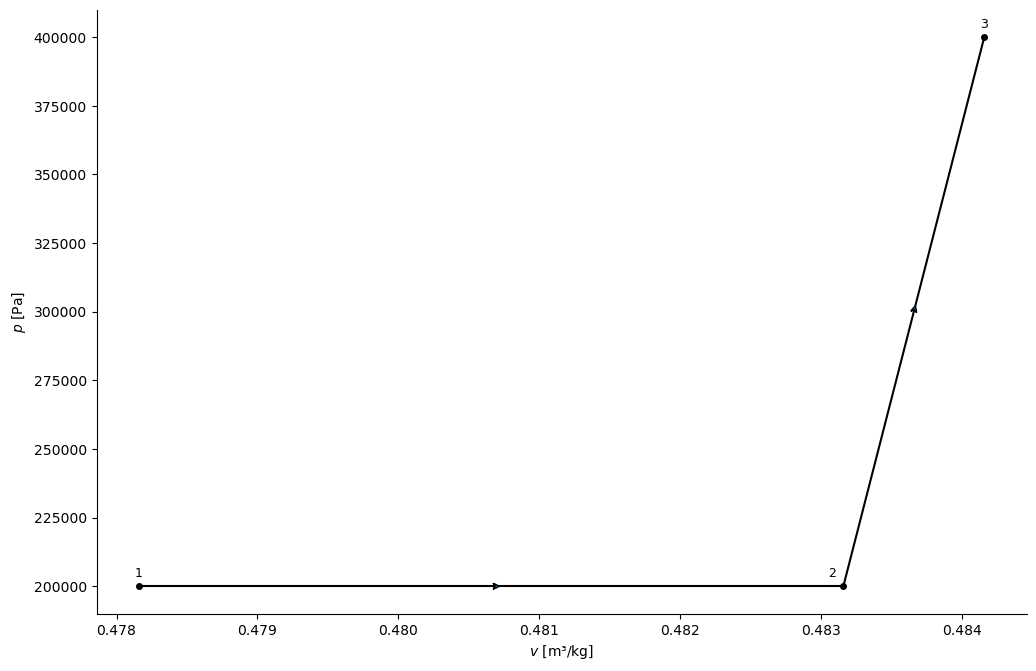

In [17]:
# Plot p-v diagram
pv = air.pv_diagram(unit_system='SI_K')
pv.plot_state(states[1])
pv.plot_state(states[2],label_loc='north west')
pv.plot_state(states[3])
pv.plot_process(states[1],states[2],path='isobaric')
pv.plot_process(states[2],states[3],path='straight');

#### (e) How much exergy is stored in the system at the end of the process?
The dead state properties are the properties the fluid would have if it were allowed to reach equilibrium with the surroundings, i.e. $T_0$ and $p_0$

In [18]:
# Need dead state properties
v[0] = air.v(T[0], p[0])
Vol[0] = m*v[0]
u[0] = air.u(T[0], p[0])
s[0] = air.s(T[0], p[0])

Calculations();

 Need dead state properties

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

The exergy at state 3 is then defined as the potential for the fluid to do work relative to the dead state

In [19]:
# Exergy at 3
X[3] = m*(u[3]-u[0]) + p[0]*(Vol[3]-Vol[0]) - T[0].to('K')*m*(s[3]-s[0])

Calculations();

 Exergy at 3

<IPython.core.display.Latex object>

#### (f) What is the change in exergy for the process
We can use the same method to caluclate the exergy at the beginning of the process

In [20]:
# Exergy at 1
X[1] = m*(u[1]-u[0]) + p[0]*(Vol[1]-Vol[0]) - T[0].to('K')*m*(s[1]-s[0])

Calculations();

 Exergy at 1

<IPython.core.display.Latex object>

Then the change in exergy of the process is simply the difference between the two states

In [21]:
# Change in Exergy
Delta_X_1_to_3 = X[3]-X[1]

Calculations();

 Change in Exergy

<IPython.core.display.Latex object>

#### (g) How much exergy was destroyed during the process?
The exergy destruction can always be calculated as $T_0\cdot S_{gen}$

In [22]:
# Exergy destruction
X_d = T[0].to('K')*S_gen

Calculations();

 Exergy destruction

<IPython.core.display.Latex object>

#### (f) Second Law Efficiency
The second law efficiency is defined as the ratio of the recovered exergy to the expended exergy,
\[\eta_{II} = \frac{X_{recovered}}{X_{expended}}=1-\frac{X_{destroyed}}{X_{expended}}\]
We already know the exergy destruction, so we just need to find the expended exergy.  

In this case, the heat that was transferred to the system from the hot reservoir could have been used for some other purpose, such as to power a heat engine.  So the expended exergy for this process is the decrease in potential of the reservoir.  Since we are treating the reservoir as being constant temperature, we can't calculate a change in property of the reservoir, but we can calculate the amount of exergy the left the reservior through heat transfer.

In [23]:
# Exergy expended is due to heat transfer from the high temperature reservoir
X_exp = (1 - T[0].to('K')/T_R.to('K'))*Q_1_to_3

Calculations();

 Exergy expended is due to heat transfer from the high temperature reservoir

<IPython.core.display.Latex object>

Finally then second law efficiency can be calculated

In [24]:
# Second Law Efficiency
eta_II = 1 - X_d/X_exp

Calculations();

 Second Law Efficiency

<IPython.core.display.Latex object>

#### Summary of Results

In [25]:
Summary();

<IPython.core.display.Latex object>

,T,p,v,u,s,Vol,X
unit,°C,kPa,m³/kg,kJ/kg,kJ/K/kg,m³,kJ
0,20.000000,100.0,0.841495,-93.4384,6.684495,1.682989,-
1,60.000000,200.0,0.478158,-64.6923,6.614160,0.956316,26.0624
2,63.483681,200.0,0.483158,-,6.624638,0.966316,-
3,401.510835,400.0,0.484158,190.039,7.141563,0.968316,227.508
